In [1]:
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# **0. Importar os dados das abas em cor verde do arquivo de Excel**

In [2]:
df_transacoes_pl = pd.read_excel("Exercicio_Python_CRM .xlsx", sheet_name="Transações")
df_produto_pl = pd.read_excel("Exercicio_Python_CRM .xlsx", sheet_name="Produto")
df_lojas_pl = pd.read_excel("Exercicio_Python_CRM .xlsx", sheet_name="Lojas")
df_cliente_pl = pd.read_excel("Exercicio_Python_CRM .xlsx", sheet_name="Cliente")
df_teste_pl = pd.read_excel("Exercicio_Python_CRM .xlsx", sheet_name="Teste")

# **1. Limpar e preparar os dados**
    -Eliminando os possíveis espaços no início e no final de cada coluna nas diferentes tabelas


In [3]:
df_transacoes_pl.head()

,ID_Trans,Data,ID_Loja,ID_Produto,ID_Cliente,UnidadesVendidas,ValorTotal,Promo
0,1,2022-01-01,7,123005,90023,2,99.98,0.0
1,2,2022-01-01,9,123004,90092,1,35.99,0.0
2,3,2022-01-01,1,123001,90027,2,51.98,0.0
3,4,2022-01-01,3,123001,90097,2,51.98,0.0
4,5,2022-01-01,4,123004,90089,2,71.98,0.0


In [4]:
df_produto_pl.head()

,ID_Produto,Descrição Produto,Categoria,Cor,Marca
0,123000,Bottom Azul Marca AlfaX,Bottom,Azul,AlfaX
1,123001,Top Cinza Marca GammaZ,Top,Cinza,GammaZ
2,123002,Bottom Preto Marca BetaY,Bottom,Preto,BetaY
3,123003,Top Marca BetaY,Top,Vermelho,BetaY
4,123004,Top Cinza Marca BetaY,Top,Cinza,BetaY


In [5]:
df_lojas_pl.head()

,ID_Loja,UF,Regiao
0,1,AM,NORTE
1,2,MG,CENTRO-OESTE
2,3,SP,SUDESTE
3,4,SP,NaN
4,5,SP,SUDESTE


In [6]:
df_cliente_pl.head()

,CustomerID,Genero,FaixaIdade,ClasseSocial
0,90000,Feminino,35-45,C
1,90001,Feminino,45+,D
2,90002,Feminino,18-25,C
3,90003,Feminino,45+,C
4,90004,Feminino,35-45,C


In [7]:
df_teste_pl.head()

,CustomerID,Grupo,Enviado,Recebido,Aberto,Sessao,Comprou
0,90000,TESTE,1,1,1,1,1
1,90001,TESTE,1,1,0,0,0
2,90002,CONTROLE,1,1,0,0,0
3,90003,TESTE,1,1,1,1,1
4,90004,TESTE,1,1,1,1,1


In [8]:
# Renomeando colunas do dataset cliente e teste
# Padronizando para realizar "merge" com os demais dataframes 

df_cliente_pl.rename(columns={"CustomerID": "ID_Cliente"}, inplace=True)
df_teste_pl.rename(columns={"CustomerID": "ID_Cliente"}, inplace=True)

In [9]:
# Os valores ausentes da coluna Genero foram inputados como Indefinido, tendo em vista que, podem ser clientes que escolheram não indentificar seu gênero.

values = {"Genero": "Indefinido"}
df_cliente_pl.fillna(value=values, inplace=True)

In [10]:
# Juntando os dataframes 

df = pd.merge(df_transacoes_pl, df_produto_pl, how = 'inner', on = 'ID_Produto')
df = pd.merge(df, df_lojas_pl, how = 'inner', on = 'ID_Loja')
df = pd.merge(df, df_cliente_pl, how = 'inner', on = 'ID_Cliente')

In [11]:
# Visualizando o dataset

df.head()

,ID_Trans,Data,ID_Loja,ID_Produto,ID_Cliente,UnidadesVendidas,ValorTotal,Promo,Descrição Produto,Categoria,Cor,Marca,UF,Regiao,Genero,FaixaIdade,ClasseSocial
0,1,2022-01-01,7,123005,90023,2,99.98,0.0,Top Cinza Marca AlfaX,Top,Cinza,AlfaX,RS,SUL,Masculino,35-45,C
1,2,2022-01-01,9,123004,90092,1,35.99,0.0,Top Cinza Marca BetaY,Top,Cinza,BetaY,BH,NORDESTE,Masculino,35-45,C
2,3,2022-01-01,1,123001,90027,2,51.98,0.0,Top Cinza Marca GammaZ,Top,Cinza,GammaZ,AM,NORTE,Masculino,25-35,C
3,4,2022-01-01,3,123001,90097,2,51.98,0.0,Top Cinza Marca GammaZ,Top,Cinza,GammaZ,SP,SUDESTE,Masculino,45+,C
4,5,2022-01-01,4,123004,90089,2,71.98,0.0,Top Cinza Marca BetaY,Top,Cinza,BetaY,SP,NaN,Masculino,18-25,C


In [12]:
# Verificando a dimensão dos dados

df.shape

(7791, 17)

In [13]:
# Verificando os tipos dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Trans           7791 non-null   int64         
 1   Data               7791 non-null   datetime64[ns]
 2   ID_Loja            7791 non-null   int64         
 3   ID_Produto         7791 non-null   int64         
 4   ID_Cliente         7791 non-null   int64         
 5   UnidadesVendidas   7791 non-null   int64         
 6   ValorTotal         7791 non-null   float64       
 7   Promo              7775 non-null   float64       
 8   Descrição Produto  7791 non-null   object        
 9   Categoria          7791 non-null   object        
 10  Cor                7791 non-null   object        
 11  Marca              7791 non-null   object        
 12  UF                 7791 non-null   object        
 13  Regiao             6492 non-null   object        
 14  Genero  

In [14]:
# Verificando a quantidade de valores ausentes

df.isnull().sum()

ID_Trans                0
Data                    0
ID_Loja                 0
ID_Produto              0
ID_Cliente              0
UnidadesVendidas        0
ValorTotal              0
Promo                  16
Descrição Produto       0
Categoria               0
Cor                     0
Marca                   0
UF                      0
Regiao               1299
Genero                  0
FaixaIdade              0
ClasseSocial            0
dtype: int64

In [15]:
# Percentual de valores ausentes

(df.isnull().sum() * 100) / df.shape[0]

ID_Trans              0.000000
Data                  0.000000
ID_Loja               0.000000
ID_Produto            0.000000
ID_Cliente            0.000000
UnidadesVendidas      0.000000
ValorTotal            0.000000
Promo                 0.205365
Descrição Produto     0.000000
Categoria             0.000000
Cor                   0.000000
Marca                 0.000000
UF                    0.000000
Regiao               16.673084
Genero                0.000000
FaixaIdade            0.000000
ClasseSocial          0.000000
dtype: float64

In [16]:
# A coluna Região possui mais de 16% dos valores ausentes
# Essa coluna será removida. No momento, não é possivel obter informações junto ao gestores para uma possível inputação desses dados.

df.drop(['Regiao'], axis=1, inplace=True) 

In [17]:
df["Genero"].value_counts()

Genero
Feminino      4929
Masculino     2322
Indefinido     540
Name: count, dtype: int64

In [18]:
# Exclui linhas com valores ausentes na coluna "Promo" ou em qualquer outra coluna do dataset

df.dropna(inplace=True)

In [19]:
# Verifica se há valores duplicados no dataset

df.duplicated().sum()

0

In [20]:
# Verificando a dimensão dos dados depois da limpeza

df.shape

(7775, 16)

In [21]:
df.columns

Index(['ID_Trans', 'Data', 'ID_Loja', 'ID_Produto', 'ID_Cliente',
       'UnidadesVendidas', 'ValorTotal', 'Promo', 'Descrição Produto',
       'Categoria', 'Cor', 'Marca', 'UF', 'Genero', 'FaixaIdade',
       'ClasseSocial'],
      dtype='object')

In [22]:
df["UF"].value_counts()

UF
RS       1689
SP        925
 BH       902
MG        876
   SP     861
 SP       840
SP        812
BH        437
AM        433
Name: count, dtype: int64

In [23]:
# Removendo espaços em branco da coluna "UF"

df["UF"] = df["UF"].str.strip()

In [24]:
df["UF"].value_counts()

UF
SP    3438
RS    1689
BH    1339
MG     876
AM     433
Name: count, dtype: int64

In [25]:
# Adicionando a coluna "Ano" no dataset

df['Ano'] = df['Data'].dt.year

In [26]:
# Verificando medidas estatísticas para os dados

df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID_Trans,7775.0,3896.989582,1.0,1945.5,3901.0,5845.5,7791.0,2249.881273
Data,7775,2022-11-19 11:49:43.254019584,2022-01-01 00:00:00,2022-05-08 00:00:00,2023-01-01 00:00:00,2023-06-02 00:00:00,2023-09-30 00:00:00,NaN
ID_Loja,7775.0,5.485788,1.0,3.0,5.0,8.0,10.0,2.65202
ID_Produto,7775.0,123005.204373,123000.0,123003.0,123005.0,123008.0,123011.0,2.871134
ID_Cliente,7775.0,90050.015563,90000.0,90025.0,90050.0,90076.0,90099.0,28.779135
UnidadesVendidas,7775.0,2.301479,1.0,2.0,2.0,3.0,4.0,0.891989
ValorTotal,7775.0,114.155185,16.99,55.99,89.99,161.973,367.96,72.632434
Promo,7775.0,0.074212,0.0,0.0,0.0,0.0,1.0,0.262133
Ano,7775.0,2022.503151,2022.0,2022.0,2023.0,2023.0,2023.0,0.500022


# **2. Trazer os principais KPIs que resumam o comportamento da base: gasto por cliente, itens comprados, frequência, etc. Você pode mostrá-los em gráficos e trazer as médias e distribuição dos valores. É importante que você escreva com suas próprias palavras uma conclusão sobre o que pode ser observado nos gráficos.**

### **1 - Gasto por Cliente (Ticket Médio):**

In [27]:
# Ticket Médio: 
    # É um indicador que revela o quanto uma empresa/loja fatura em cada venda
    # É o valor médio das vendas de um período.
    # É o valor médio gasto por cliente em um determinado período de tempo, ou seja, quanto os clientes gastam, em média, em cada compra na sua loja.
    # Uma empresa que tem um ticket médio de 100 por venda, indica que a media de gasto de um cliente que entra pra comprar um produto na loja é de 100 reais

# Portanto, podemos obter o ticket médio quando dividimos o valor total das vendas pelo número total de vendas.
# Valor Total de Vendas em X Período/ Número Total de Vendas em X Período

In [28]:
print(f'Ticket Médio 2022: {round(df[(df["Ano"] == 2022)]["ValorTotal"].sum() / df[(df["Ano"] == 2022)]["ID_Trans"].count(),2)}')

print(f'Ticket Médio 2023: {round(df[(df["Ano"] == 2023)]["ValorTotal"].sum() / df[(df["Ano"] == 2023)]["ID_Trans"].count(),2)}')

print(f'Ticket Médio da Base: {round(df["ValorTotal"].sum() / df["ID_Trans"].count(),2)}')

Ticket Médio 2022: 108.84
Ticket Médio 2023: 119.41
Ticket Médio da Base: 114.16


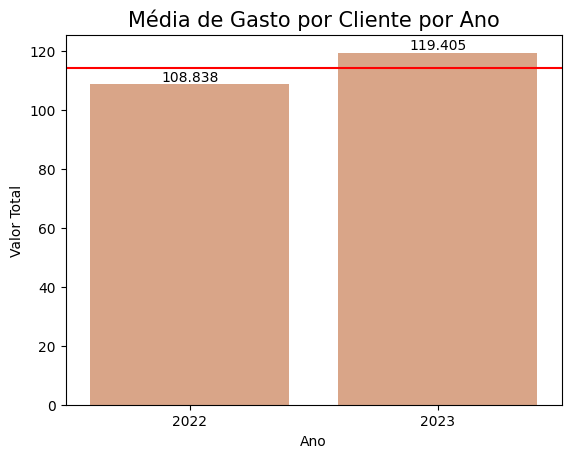

In [29]:
# A média de gasto por cliente em 2022 foi de 108.838 e em 2023 de 119.405

# O ticket médio em 2023 teve um aumento de 9.71% em relação ao ano de 2022, indicando que houve um aumento no consumo de produtos por parte dos clientes.

ax = sns.barplot(df, x="Ano", y="ValorTotal", estimator="mean", errorbar=None, color='#e7a17a')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Média de Gasto por Cliente por Ano" , size = 15);
ax.set_ylabel("Valor Total");
media = round(df["ValorTotal"].sum() / df["ID_Trans"].count(),2)
ax.axhline(y=media, color='r', linestyle='-', label='Média');


**Distribuição de Gasto por Cliente:**

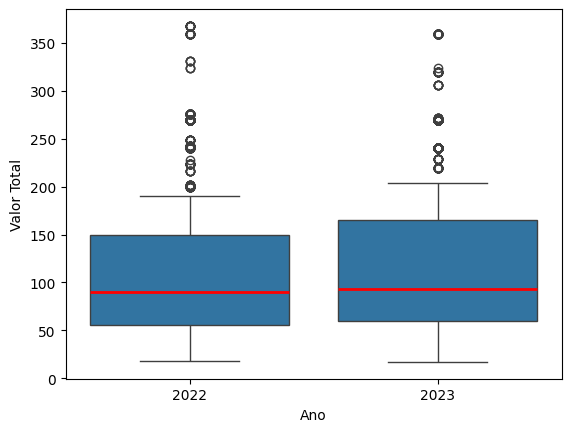

In [30]:
# Visualizando a distribuição de gastos por ano

ax = sns.boxplot(df, x="Ano", y="ValorTotal", medianprops={"color": "r", "linewidth": 2}, whis=0.5);
ax.set_ylabel("Valor Total");

In [31]:
df[df["Ano"] == 2022]["ValorTotal"].describe()

count    3863.000000
mean      108.838280
std        69.413379
min        17.991000
25%        55.980000
50%        89.982000
75%       149.970000
max       367.960000
Name: ValorTotal, dtype: float64

In [32]:
df[df["Ano"] == 2023]["ValorTotal"].describe()[['count','mean','std','min','25%','50%','75%','max']]

count    3912.000000
mean      119.405493
std        75.318315
min        16.990000
25%        59.990000
50%        92.970000
75%       164.970000
max       359.960000
Name: ValorTotal, dtype: float64

In [33]:
# Distribuição de Gasto por Cliente:

# Em 2022
# 25% dos clientes gastaram até R$ 55,98.
# 50% dos clientes gastaram até R$ 89,982.
# 75% dos clientes gastaram até R$ 149,97.

# Em 2023
# 25% dos clientes gastaram até R$ 59,99.
# 50% dos clientes gastaram até R$ 92,97.
# 75% dos clientes gastaram até R$ 164,97.

# A maioria dos clientes gasta entre R$ 89 e R$165, com alguns outliers acima desse intervalo.

df.groupby(["Ano"])["ValorTotal"].describe()

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2022,3863.0,108.838280,69.413379,17.991,55.98,89.982,149.97,367.96
2023,3912.0,119.405493,75.318315,16.990,59.99,92.970,164.97,359.96


### **2 - Itens Comprados**

In [34]:
# Itens Comprados
    # É o número médio de itens comprados por venda/transação
    # Número Total de Itens Vendidos / Número Total de Vendas

print(f'Itens Comprados 2022: {round(df[(df["Ano"] == 2022)]["UnidadesVendidas"].sum() / df[(df["Ano"] == 2022)]["ID_Trans"].count(),2)}')

print(f'Itens Comprados 2023: {round(df[(df["Ano"] == 2023)]["UnidadesVendidas"].sum() / df[(df["Ano"] == 2023)]["ID_Trans"].count(),2)}')

print(f'Itens Comprados Base: {round(df["UnidadesVendidas"].sum() / df["ID_Trans"].count(),2)}')

Itens Comprados 2022: 2.33
Itens Comprados 2023: 2.27
Itens Comprados Base: 2.3


In [35]:
# Percentual (%) = 100 * ((valorFinal - valorInicial) / valorInicial)

inicial = df[(df["Ano"] == 2022)]["UnidadesVendidas"].sum() / df[(df["Ano"] == 2022)]["ID_Trans"].count()
final = df[(df["Ano"] == 2023)]["UnidadesVendidas"].sum() / df[(df["Ano"] == 2023)]["ID_Trans"].count()

percentual = 100 * ((final - inicial) / inicial)

print(f"Percentual Itens Comprados: {round(percentual, 2)}%")

Percentual Itens Comprados: -2.46%


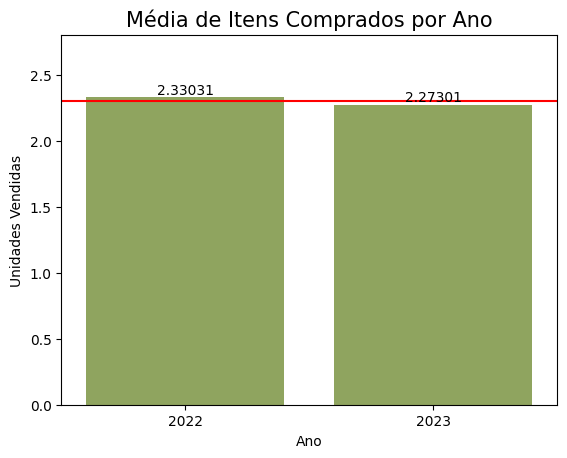

In [36]:
# A média de itens comprados por cliente em 2022 foi de 2.33 e em 2023 de 2.27

# A média de itens comprados em 2023 teve uma queda de 2.46% quando comparado com o ano de 2022.

ax = sns.barplot(df, x="Ano", y="UnidadesVendidas", estimator="mean", errorbar=None, color='#94b053');
media = round(df["UnidadesVendidas"].sum() / df["ID_Trans"].count(),2);
ax.axhline(y=media, color='r', linestyle='-', label='Média');
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Média de Itens Comprados por Ano" , size = 15);
ax.set_ylabel("Unidades Vendidas");
plt.ylim(0, 2.8);

In [37]:
# Distribuição de Itens Comprados por Cliente:

# Em 2022 e em 2023
# 50% dos clientes compraram até 2 itens.
# 75% dos clientes compraram até 3 itens.


# A maioria dos clientes compra entre 2 e 3 itens, com alguns outliers acima desse intervalo.

df.groupby(["Ano"])["UnidadesVendidas"].describe()

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
2022,3863.0,2.330313,0.866028,1.0,2.0,2.0,3.0,4.0
2023,3912.0,2.273006,0.916123,1.0,2.0,2.0,3.0,4.0


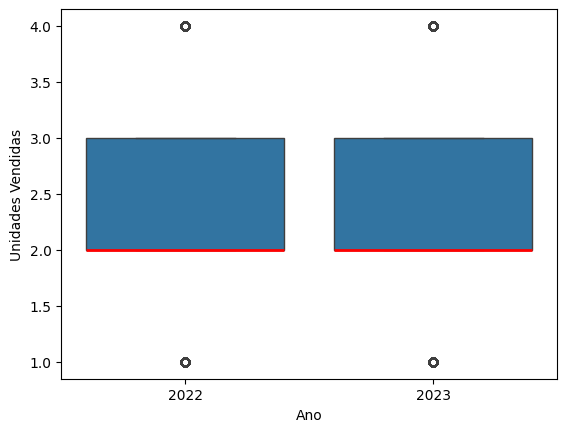

In [38]:
ax = sns.boxplot(df, x="Ano", y="UnidadesVendidas", medianprops={"color": "r", "linewidth": 2}, whis=0.5);
ax.set_ylabel("Unidades Vendidas");


### **3 - Frequência de Compras**

In [39]:
# Frequência de Compras
    # É o número médio de vezes que um cliente compra na empresa/loja dentro de um determinado período de tempo
    # Número Total de Vendas em X Período / Número Total de Compradores Únicos em X Período


In [40]:
print(f'Frequência de Compra 2022: {round(df[(df["Ano"] == 2022)]["ID_Trans"].count() / len(df[(df["Ano"] == 2022)]["ID_Cliente"].unique()),2)}')
print(f'Frequência de Compra 2023: {round(df[(df["Ano"] == 2023)]["ID_Trans"].count() / len(df[(df["Ano"] == 2023)]["ID_Cliente"].unique()),2)}')

print(f'Frequência de Compra Base: {round(df["ID_Trans"].count() / len(df["ID_Cliente"].unique()),2)}')


Frequência de Compra 2022: 38.63
Frequência de Compra 2023: 39.12
Frequência de Compra Base: 77.75


In [41]:
dados_frequencia = [[2022, round(df[(df["Ano"] == 2022)]["ID_Trans"].count() / len(df[(df["Ano"] == 2022)]["ID_Cliente"].unique()),2)],[2023, round(df[(df["Ano"] == 2023)]["ID_Trans"].count() / len(df[(df["Ano"] == 2023)]["ID_Cliente"].unique()),2)]]

frequencia = pd.DataFrame(dados_frequencia, columns=['Ano', 'Frequência'])
frequencia

,Ano,Frequência
0,2022,38.63
1,2023,39.12


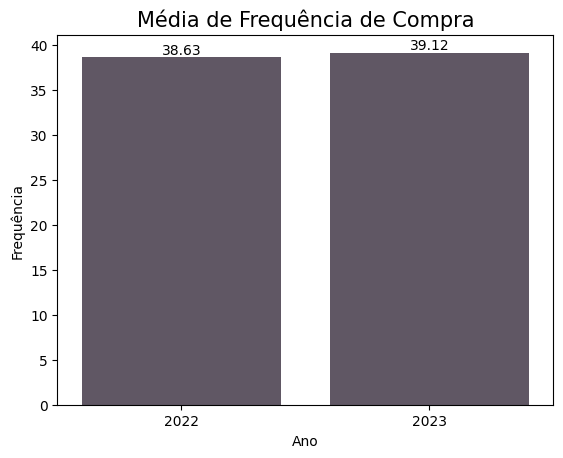

In [42]:
# O número médio de vezes que um cliente comprou na loja em 2022 no período de Janeiro a Setembro foi de 38.63. 
# A frequência de compras dos clientes aumentou em 2023, passando para 39.12. Um aumento de 1.27% na frequência de compras.

ax = sns.barplot(frequencia, x="Ano", y="Frequência", estimator="mean", errorbar=None, color="#615566");
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Média de Frequência de Compra" , size = 15);


In [43]:
# Percentual (%) = 100 * ((valorFinal - valorInicial) / valorInicial)

inicial = round(df[(df["Ano"] == 2022)]["ID_Trans"].count() / len(df[(df["Ano"] == 2022)]["ID_Cliente"].unique()),2)
final = round(df[(df["Ano"] == 2023)]["ID_Trans"].count() / len(df[(df["Ano"] == 2023)]["ID_Cliente"].unique()),2)

percentual = 100 * ((final - inicial) / inicial)

print(f"Percentual da Frequência: {round(percentual, 2)}%")

Percentual da Frequência: 1.27%


In [44]:
cliente_agrup = df.groupby(['ID_Cliente'])[["ID_Trans"]].count()
cliente_agrup.head(3)


,ID_Trans
ID_Cliente,
90000,39
90001,78
90002,68


### **4 - Faturamento**

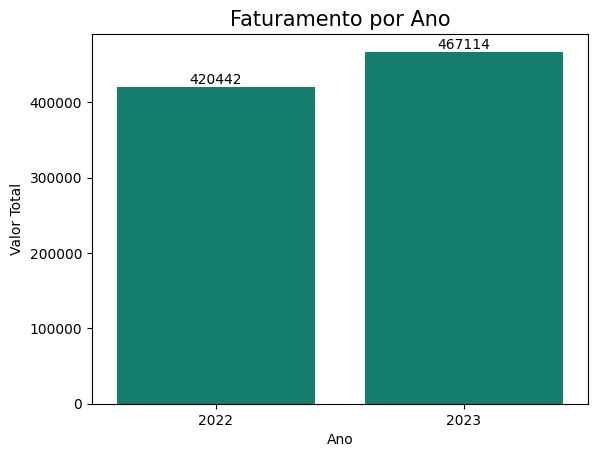

In [45]:
# O faturamento na venda de produtos na loja foi maior para o ano de 2023.

# O faturamento apresentou um aumento de 11.1% em 2023 quando comparado com o ano de 2022.

ax = sns.barplot(df, x="Ano", y="ValorTotal", estimator="sum", errorbar=None, color='#028f76')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Faturamento por Ano" , size = 15);
ax.set_ylabel("Valor Total");


In [46]:
# Aumento Percentual (%) = 100 * ((valorFinal - valorInicial) / valorInicial)

inicial = df[(df["Ano"] == 2022)]["ValorTotal"].sum()
final = df[(df["Ano"] == 2023)]["ValorTotal"].sum()

percentual = 100 * ((final - inicial) / inicial)

print(f"Aumento Percentual Faturamento: {round(percentual, 2)}%")


Aumento Percentual Faturamento: 11.1%


### **5 - Carteira de Clientes**

In [47]:
# Carteira de Clientes
    # Agrupamento de todos os clientes da empresa em diferentes categorias. Por exemplo: idade, gênero.

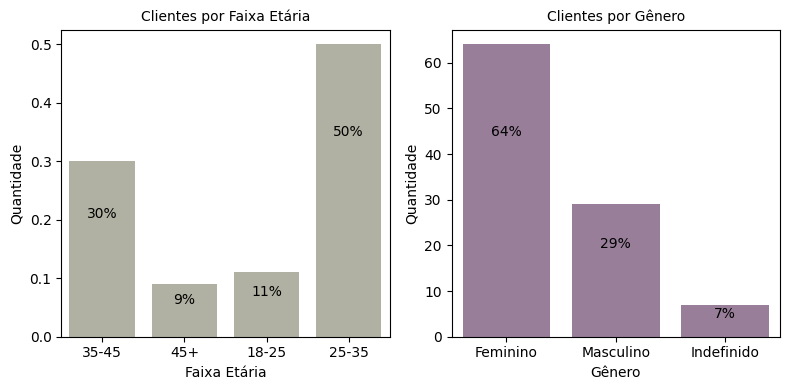

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

sns.countplot(x=df_cliente_pl["FaixaIdade"], ax=ax[0], stat="probability", color="#b2b39f")
sns.countplot(x=df_cliente_pl["Genero"], ax=ax[1], stat="percent", color='#9c7a9d')
#ax[0].bar_label(ax[0].containers[0], fontsize=9)
#ax[1].bar_label(ax[1].containers[0], fontsize=9)
ax[0].set_title("Clientes por Faixa Etária" , size = 10 )
ax[1].set_title("Clientes por Gênero" , size = 10)
ax[0].set_ylabel("Quantidade")
ax[1].set_ylabel("Quantidade")
ax[0].set_xlabel("Faixa Etária")
ax[1].set_xlabel("Gênero")

for p in ax[0].patches:
   width = p.get_width()
   height = p.get_height()
   x ,y = p.get_xy()
   ax[0].annotate('{:.0f}%'.format(height*100), (x + width/2, y + height*0.7), va='center', ha='center')

for p in ax[1].patches:
   width = p.get_width()
   height = p.get_height()
   x ,y = p.get_xy()
   ax[1].annotate('{:.0f}%'.format(height), (x + width/2, y + height*0.7), va='center', ha='center')

fig.tight_layout()

In [49]:
# 50% dos clientes que compram na loja possuem entre 25 e 35 anos.
# 70% dos clientes tem idade de 25 anos ou mais.

# A maior parte das pessoas que compram na loja são do gênero Feminino com uma representatividade de 64% na base.

# **3. No ano 2023 as campanhas se focaram na venda do Top vermelho marca “Gamma Z”. Por favor avalie se estes produtos tiveram melhor desempenho**

In [50]:
df_vendas = df[(df["Cor"] == "Vermelho") & (df["Categoria"] == "Top") & (df["Marca"] == "GammaZ")]
df_vendas.reset_index(drop=True, inplace=True)
df_vendas.head()

,ID_Trans,Data,ID_Loja,ID_Produto,ID_Cliente,UnidadesVendidas,ValorTotal,Promo,Descrição Produto,Categoria,Cor,Marca,UF,Genero,FaixaIdade,ClasseSocial,Ano
0,22,2022-01-04,2,123008,90096,3,269.97,0.0,Top Marca GammaZ,Top,Vermelho,GammaZ,MG,Masculino,18-25,A,2022
1,26,2022-01-04,7,123008,90055,4,359.96,0.0,Top Marca GammaZ,Top,Vermelho,GammaZ,RS,Masculino,25-35,D,2022
2,31,2022-01-04,3,123008,90075,3,269.97,0.0,Top Marca GammaZ,Top,Vermelho,GammaZ,SP,Masculino,25-35,B,2022
3,34,2022-01-04,2,123008,90094,3,269.97,0.0,Top Marca GammaZ,Top,Vermelho,GammaZ,MG,Masculino,25-35,C,2022
4,39,2022-01-04,4,123009,90048,4,367.96,0.0,Top Marca GammaZ,Top,Vermelho,GammaZ,SP,Feminino,35-45,C,2022


In [51]:
df_vendas["Ano"].value_counts()

Ano
2023    773
2022    640
Name: count, dtype: int64

In [52]:
df_vendas["ID_Produto"].value_counts()

ID_Produto
123008    822
123009    591
Name: count, dtype: int64

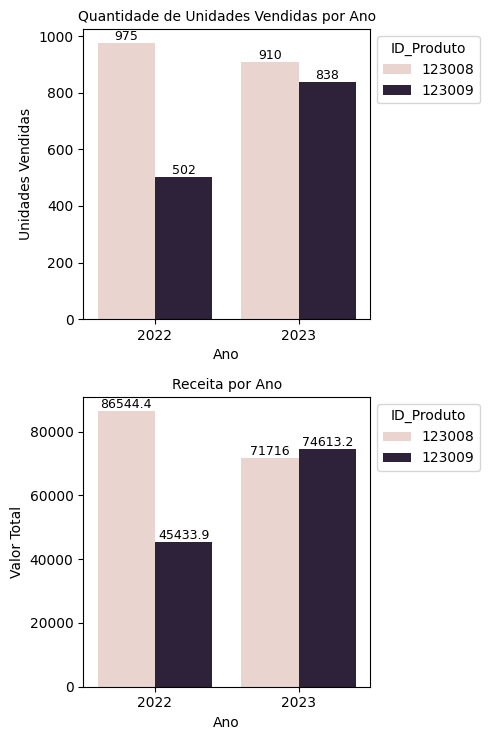

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(5,7.5))

sns.barplot(df_vendas, x="Ano", y="UnidadesVendidas", hue="ID_Produto", estimator="sum", errorbar=None, ax=ax[0])
sns.barplot(df_vendas, x="Ano", y="ValorTotal", hue="ID_Produto", estimator="sum", errorbar=None, ax=ax[1])
sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1))
ax[0].bar_label(ax[0].containers[0], fontsize=9)
ax[0].bar_label(ax[0].containers[1], fontsize=9)
ax[1].bar_label(ax[1].containers[0], fontsize=9)
ax[1].bar_label(ax[1].containers[1], fontsize=9)
ax[0].set_title("Quantidade de Unidades Vendidas por Ano" , size = 10 )
ax[1].set_title("Receita por Ano" , size = 10 )
ax[0].set_ylabel("Unidades Vendidas")
ax[1].set_ylabel("Valor Total")
#fig.suptitle('Desempenho de Produtos Vendidos: Top Vermelho Marca GammaZ', fontsize=15)
fig.tight_layout()

In [54]:
# Aumento Percentual Unidades Vendidas (%) = 100 * ((valorFinal - valorInicial) / valorInicial)

inicial_p008 = df_vendas[(df_vendas["ID_Produto"] == 123008) & (df_vendas["Ano"] == 2022)]["UnidadesVendidas"].sum()
final_p008 = df_vendas[(df_vendas["ID_Produto"] == 123008) & (df_vendas["Ano"] == 2023)]["UnidadesVendidas"].sum()

inicial_p009 = df_vendas[(df_vendas["ID_Produto"] == 123009) & (df_vendas["Ano"] == 2022)]["UnidadesVendidas"].sum()
final_p009 = df_vendas[(df_vendas["ID_Produto"] == 123009) & (df_vendas["Ano"] == 2023)]["UnidadesVendidas"].sum()

percentual_p008 = 100 * ((final_p008 - inicial_p008) / inicial_p008)
percentual_p009 = 100 * ((final_p009 - inicial_p009) / inicial_p009)

print(f"Aumento Percentual Unidades Vendidas - Produto 123008: {round(percentual_p008, 2)}%")
print(f"Aumento Percentual Unidades Vendidas - Produto 123009: {round(percentual_p009, 2)}%")

Aumento Percentual Unidades Vendidas - Produto 123008: -6.67%
Aumento Percentual Unidades Vendidas - Produto 123009: 66.93%


In [55]:
# Aumento Percentual Receita (%) = 100 * ((valorFinal - valorInicial) / valorInicial)

inicial_p008 = df_vendas[(df_vendas["ID_Produto"] == 123008) & (df_vendas["Ano"] == 2022)]["ValorTotal"].sum()
final_p008 = df_vendas[(df_vendas["ID_Produto"] == 123008) & (df_vendas["Ano"] == 2023)]["ValorTotal"].sum()

inicial_p009 = df_vendas[(df_vendas["ID_Produto"] == 123009) & (df_vendas["Ano"] == 2022)]["ValorTotal"].sum()
final_p009 = df_vendas[(df_vendas["ID_Produto"] == 123009) & (df_vendas["Ano"] == 2023)]["ValorTotal"].sum()

percentual_p008 = 100 * ((final_p008 - inicial_p008) / inicial_p008)
percentual_p009 = 100 * ((final_p009 - inicial_p009) / inicial_p009)

print(f"Aumento Percentual Receita - Produto 123008: {round(percentual_p008, 2)}%")
print(f"Aumento Percentual Receita - Produto 123009: {round(percentual_p009, 2)}%")

Aumento Percentual Receita - Produto 123008: -17.13%
Aumento Percentual Receita - Produto 123009: 64.22%


# **4. Os times de moda e marketing estão introduzindo um novo sistema de recomendação de produtos para os disparo de e-mail. Afim de verificar a eficiência desse novo modelo, foi feito um teste em que separaram os clientes em dois grupos:**

**CONTROLE - Recebeu o e-mail com o sistema ANTIGO  de recomendação**

**TESTE - Recebeu o e-mail com o sistema NOVO de recomendação**

**Olhando para os resultados na aba Teste, responda para os times de moda e marketing se o sistema NOVO possui diferença significativa para o modelo ANTIGO**

In [56]:
df_teste_pl.head(3)

,ID_Cliente,Grupo,Enviado,Recebido,Aberto,Sessao,Comprou
0,90000,TESTE,1,1,1,1,1
1,90001,TESTE,1,1,0,0,0
2,90002,CONTROLE,1,1,0,0,0


In [57]:
df_teste_pl.isnull().sum()

ID_Cliente    0
Grupo         0
Enviado       0
Recebido      0
Aberto        0
Sessao        0
Comprou       0
dtype: int64

In [58]:
df_teste_pl["Grupo"].value_counts()

Grupo
CONTROLE    54
TESTE       46
Name: count, dtype: int64

In [59]:
# Podemos calcular as taxas médias para cada métrica (Enviado, Recebido, Aberto, Sessão, Comprou) em ambos os grupos (TESTE e CONTROLE). 

# Essas médias podem oferecer uma visão inicial do desempenho dos dois sistemas.

# A partir dessa tabela, podemos fazer algumas observações preliminares:

# A taxa média de "Abertura" para o grupo TESTE é maior do que para o grupo CONTROLE.

# As taxas médias de "Sessão" e "Conversão" também são mais altas no grupo TESTE em comparação com o grupo CONTROLE, indicando que o novo sistema pode estar contribuindo para mais compras.

# No entanto, é importante notar que estas são apenas médias, e uma análise estatística mais aprofundada é necessária para determinar se essas diferenças são estatisticamente significativas.

df_agrupado_medias = df_teste_pl.groupby(by=["Grupo"])[["Enviado", "Recebido", "Aberto", "Sessao", "Comprou"]].mean().round(2)
df_agrupado_medias.head()

,Enviado,Recebido,Aberto,Sessao,Comprou
Grupo,,,,,
CONTROLE,0.98,1.0,0.87,0.87,0.57
TESTE,0.98,1.0,0.91,0.91,0.74


In [60]:
# Vamos realizar um teste t de Student para comparar as médias das métricas "Aberto", "Sessão" e "Comprou" entre os grupos TESTE e CONTROLE. O teste t é apropriado para comparar as médias de duas amostras independentes.

# Antes de realizar o teste, definimos as hipóteses:

# Hipótese Nula (H0): Não há diferença significativa entre as médias dos grupos TESTE e CONTROLE para as métricas mencionadas.

# Hipótese Alternativa (H1): Há diferença significativa entre as médias dos grupos TESTE e CONTROLE para as métricas mencionadas.

# Nível de significância (alfa) é igual 0.05. Se o valor p <= alfa rejeitamos a hipótese nula e dizemos que os dados são estatisticamente significativos. Caso contrário, aceitamos a hipótese nula.

# Agora, vamos calcular o valor p para cada métrica:



# Teste t para "Aberto"
t_stat_aberto, p_value_aberto = stats.ttest_ind(df_teste_pl.loc[(df_teste_pl["Grupo"] == "TESTE"), ["Aberto"]], df_teste_pl.loc[(df_teste_pl["Grupo"] == "CONTROLE"), ["Aberto"]])

# Teste t para "Sessao"
t_stat_sessao, p_value_sessao = stats.ttest_ind(df_teste_pl.loc[(df_teste_pl["Grupo"] == "TESTE"), ["Sessao"]], df_teste_pl.loc[(df_teste_pl["Grupo"] == "CONTROLE"), ["Sessao"]])

# Teste t para "Comprou"
t_stat_comprou, p_value_comprou = stats.ttest_ind(df_teste_pl.loc[(df_teste_pl["Grupo"] == "TESTE"), ["Comprou"]], df_teste_pl.loc[(df_teste_pl["Grupo"] == "CONTROLE"), ["Comprou"]])

print("Teste t para 'Aberto':")
print(f"Estatística t: {round(t_stat_aberto[0], 2)}, Valor p: {round(p_value_aberto[0],2)}")

print("\nTeste t para 'Sessao':")
print(f"Estatística t: {round(t_stat_sessao[0], 2)}, Valor p: {round(p_value_sessao[0], 2)}")

print("\nTeste t para 'Comprou':")
print(f"Estatística t: {round(t_stat_comprou[0], 2)}, Valor p: {round(p_value_comprou[0], 2)}")


# Conclusão Final: Como o p-valor é maior que 0.05 para as métricas analisadas, podemos aceitar a hipótese nula. Isto é, pode-se considerar o NOVO sistema não possui diferença significativa para o modelo ANTIGO.

Teste t para 'Aberto':
Estatística t: 0.67, Valor p: 0.5

Teste t para 'Sessao':
Estatística t: 0.67, Valor p: 0.5

Teste t para 'Comprou':
Estatística t: 1.73, Valor p: 0.09
